# Anemômetro utilizando termistor

Este notebook modela um anemômetro utilizando um termistor aquecido pela corrente elétrica passando por ele e esfriado pelo escoamento ao redor do mesmo.

A resistência elétrica do termistor varia de acordo com a seguinte relação

$$
R = R_0\exp\left[ B \cdot \left(\frac{1}{T} - \frac{1}{T_0} \right) \right]
$$

Onde 
 * $T$ é a temperatura do termistor em K
 * $T_0$ é a temperatura de referência em K
 * $R_0$ é a resistência do termistor à temperature de referência $T_0$
 * $B$ é um coeficiente empírico com unidade 1/K
 

In [8]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [3]:
include("../src/ThermistorHW.jl")
using ThermistorHW

## Verificando o comportamento do Termistor NTC

Vamos modelar um termistor com as seguintes características:

 * $T_0 = 20^\circ C$
 * $R_0 = 5000\:\Omega$
 * $B = 3200\:K^{-1}$
 

In [7]:
using CurveFit

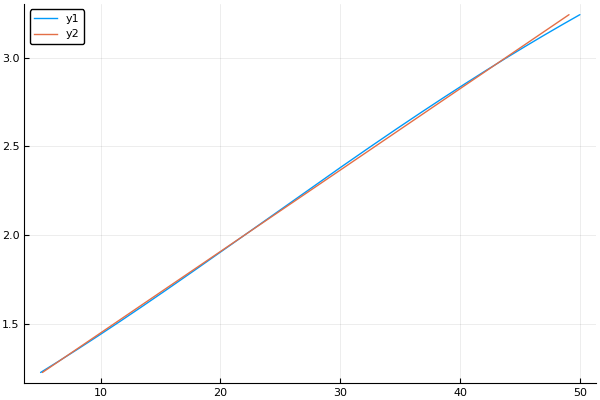

In [18]:
Ro = 15e3
R = Thermistor(20e3, 3.47e3, 25)
E = 5.0
T = 5.0:0.1:50.0
Rt = R.(T)
i = @. E /(Rt + Ro)
Vo =  Ro * i
fit = LinearFit(Vo, T)

plot(T, Vo)
plot!(fit.(Vo), Vo)


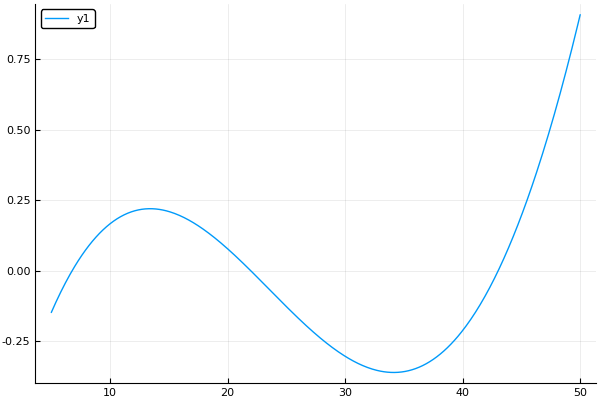

In [19]:
plot(T, T - fit.(Vo))

In [20]:
(maximum(i), minimum(i)) .* 1000

(0.21618606557251546, 0.08172410727172354)

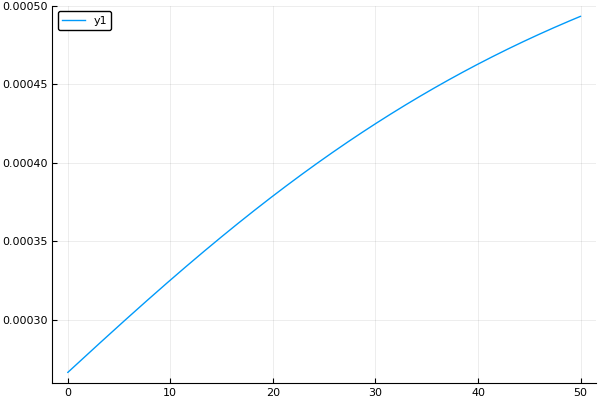

In [49]:
plot(T, i)

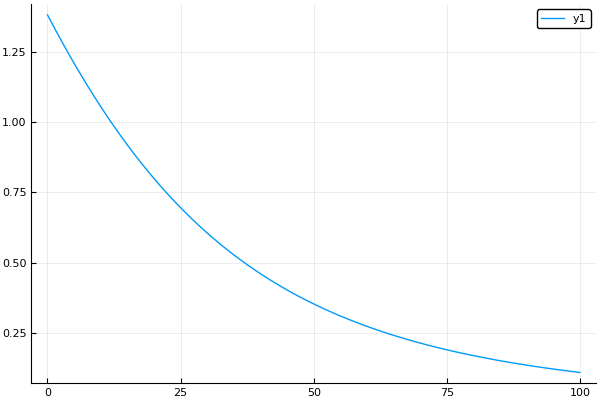

In [75]:
T1 = 0.0:0.1:100.0
Rt1 = R.(T1)
Ro1 = 20e3
Rp = Rt1 .* Ro1 ./ (Rt1 .+ Ro1)
V1 = 0.2e-3 * Rp

plot(T1, V1)

In [23]:
R = Thermistor(20e3, 3500, 25)
Pa = 93.0 # kPa, pressão atmosférica
Ta = 20.0 # Temperatura ambiente
U = 0.5:0.1:30
cca = const_current.(0.22, R, U, 2.0, Ta, Pa);
E1 = [x.E for x in cca];
T1 = [x.T for x in cca];

In [24]:
T1

296-element Array{Float64,1}:
 21.2594
 21.1852
 21.1238
 21.0717
 21.0268
 20.9874
 20.9525
 20.9212
 20.893 
 20.8673
 20.8437
 20.8221
 20.8021
  ⋮     
 20.209 
 20.2086
 20.2083
 20.2079
 20.2075
 20.2071
 20.2068
 20.2064
 20.206 
 20.2057
 20.2053
 20.205 